## Project 2
### Team 1 (Jason Givens-Doyle, Mehdi Khan, Paul Britton)

##### Introduction:
We downloaded our data in csv format from https://www.lboro.ac.uk/gawc/datasets/da6.html, which is a subset of city data that was collected by the Geography Department at Loughborough University as a part of their reserach on world cities.  Our data consist of the distribution of offices for 46 'global' advanced producer service firms over 55 world cities. Global firms are defined by having offices in at least 15 different cities. 

Service values for a firm in a city are given as 3, 2, 1 or 0, among which we used 3, 2, 1 as weights in the network (0 weights were removed). Since the graph could be a complete graph, we will analyze the cities and firms networks based on the weights to find the most valued firms and cities with most valued firms.

Import the required packages:

In [32]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bi


#### Data prepration:
We imported the csv file and did the necessary clean up and opeartions so that the original wide-format data could be presented in long-format with cities, firms, and weights in columns in a dataframe:

In [3]:
data = pd.read_csv(r'da6.csv', encoding = "ISO-8859-1", header=1)
data = data.drop("Unnamed: 47", axis=1)
colnames=data.columns.values
city_firm = pd.melt(data, id_vars='CITIES',value_vars=colnames[2:len(colnames)])
city_firm.columns=['cities','firms','weight']

In [4]:
city_firm.head(20)

cities firms  weight
0      Amsterdam    CL       3
1        Atlanta    CL       3
2        Bangkok    CL       1
3      Barcelona    CL       1
4        Beijing    CL       1
5         Berlin    CL       3
6         Boston    CL       3
7       Brussels    CL       3
8       Budapest    CL       2
9   Buenos Aires    CL       2
10       Caracas    CL       1
11       Chicago    CL       3
12    Copenhagen    CL       2
13        Dallas    CL       2
14    Dusseldorf    CL       3
15     Frankfurt    CL       3
16        Geneva    CL       2
17       Hamburg    CL       3
18     Hong Kong    CL       3
19       Houston    CL       2

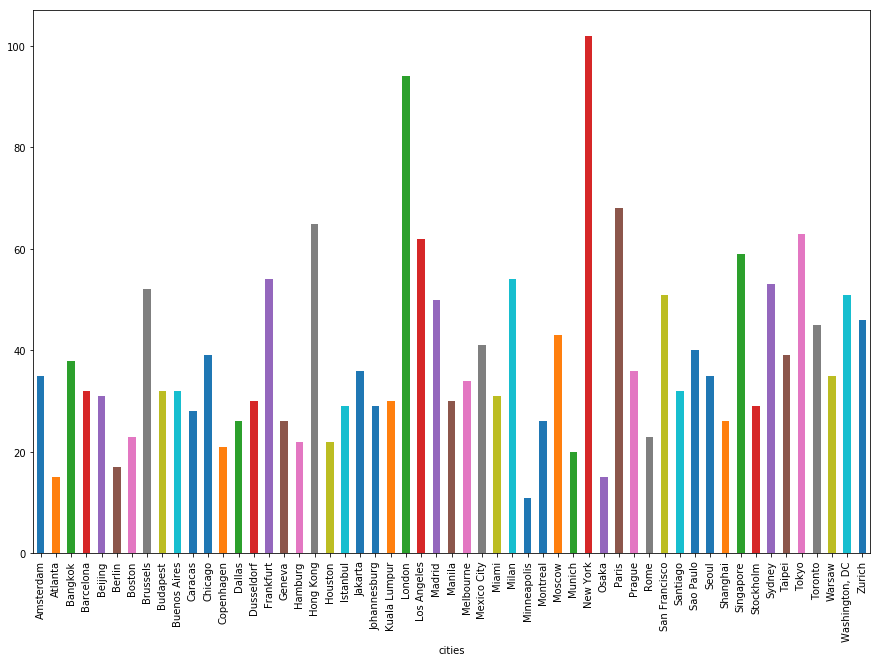

In [5]:
city_wt = pd.DataFrame(city_firm.groupby(['cities'])['weight'].sum())
city_wt = city_wt.reset_index()

city_wt.plot.bar(x='cities',y='weight', figsize=(15,10), legend=False)

The above barchart shows the combined weight i.e. total service values provided by the firms in cach city. As depicted in the chart New York, London, Paris, Los Angeles, Hong-Kong, Tokyo house the firms that provide most service values.  

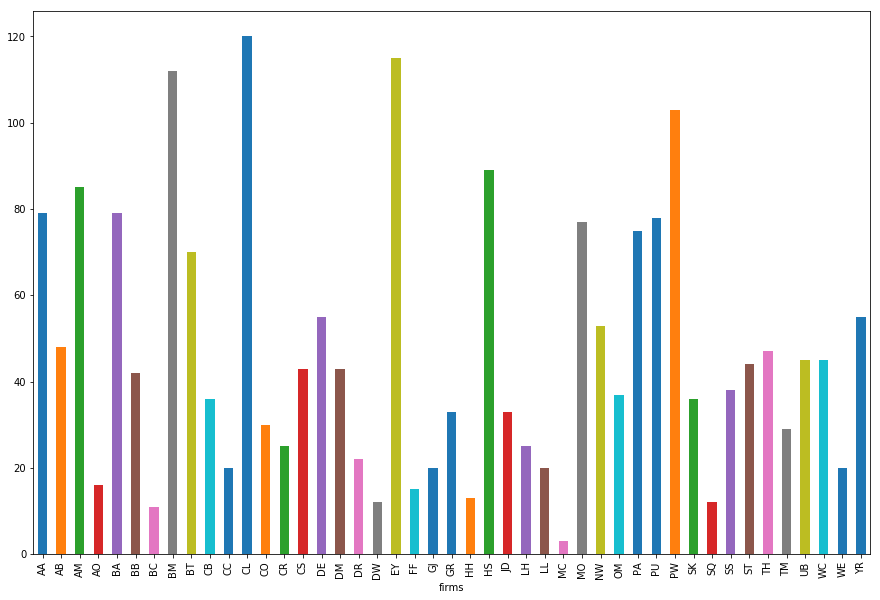

In [6]:
firm_wt = pd.DataFrame(city_firm.groupby(['firms'])['weight'].sum())
firm_wt = firm_wt.reset_index()

firm_wt.plot.bar(x='firms',y='weight', figsize=(15,10), legend=False)

The above barchart shows the combined weight i.e. total service values provided by each firms. As shown in the chart BM, CL, EY, HS, PW  provide most valued services or serve bigger number of cities.  

We will examine if the information provided by the above charts match the findings in the network analysis.

#### Creation of network  graphs

unique city and firm names were stored in seperate lists and the rows of dataframe in a list of tuples so that they could be used as the two sets of nodes and edges in a two=mode graph. 
 

In [7]:
city_nodes= list(set(city_firm["cities"].tolist()))
firm_nodes = list(set(city_firm["firms"].tolist()))
city_firm2 = city_firm[city_firm.weight!=0]
edges = [tuple(i) for i in city_firm2.values]


A bipartite graph was created with cities and nodes as  the two sets of vertices:

In [8]:
G = nx.Graph()
G.add_nodes_from(city_nodes,bipartite="cities")
G.add_nodes_from(firm_nodes,bipartite="firms")
G.add_weighted_edges_from(edges)


In [11]:
nx.is_connected(G)

True

In [13]:
bi_city_nodes, bi_firm_nodes = bi.sets(G)

<Figure size 1440x1440 with 0 Axes>

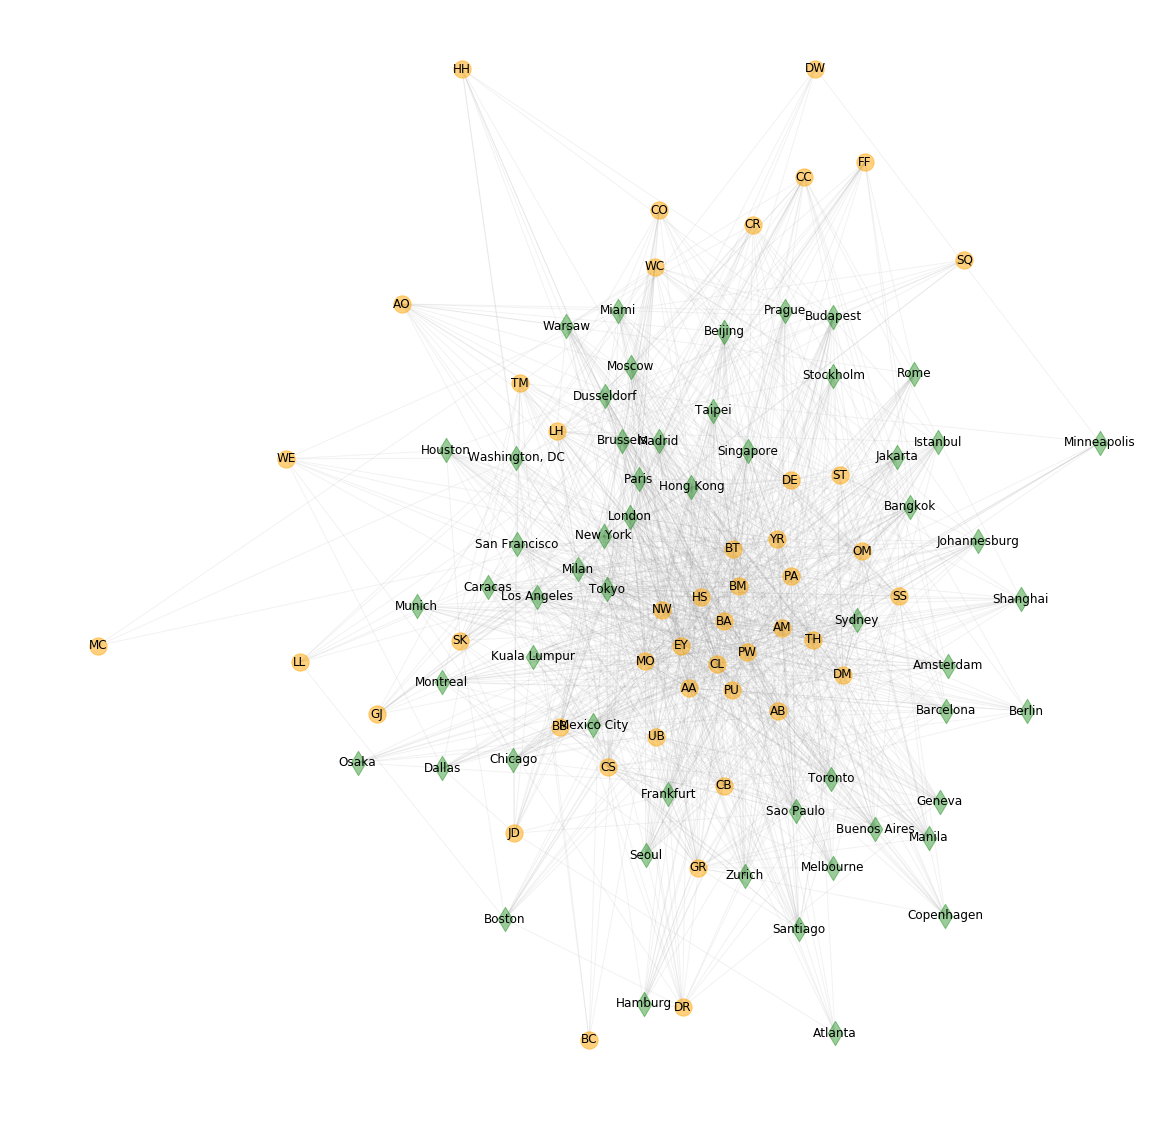

In [14]:
pos = nx.spring_layout(G,k=1)
plt.figure(figsize=(20,20))

#weights=[edata['weight'] for f,t,edata in G.edges(data=True)]
plt.figure(figsize=(20,20))
#nx.draw_networkx(G,width=weights, edge_color=weights)
#plt.show()

nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=bi_city_nodes, node_color="g", alpha=0.4, node_shape="d", node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=bi_firm_nodes, node_color="orange", alpha=0.5, node_size=300)
nx.draw_networkx_labels(G,pos, font_color='black', font_size='12')
plt.axis('off')
plt.show()

 #### Maximum cardinality matching in the above bipartite graph:

In [41]:
bi.hopcroft_karp_matching(G,bi_city_nodes)

{'Seoul': 'CL',
 'Jakarta': 'EY',
 'Hamburg': 'AA',
 'Kuala Lumpur': 'PW',
 'Houston': 'TH',
 'Geneva': 'GR',
 'Milan': 'DM',
 'Copenhagen': 'LH',
 'Osaka': 'HS',
 'Santiago': 'SS',
 'Brussels': 'OM',
 'Prague': 'YR',
 'Buenos Aires': 'PU',
 'Minneapolis': 'TM',
 'Beijing': 'DE',
 'Mexico City': 'AM',
 'Boston': 'NW',
 'Singapore': 'BA',
 'Zurich': 'DR',
 'Caracas': 'MO',
 'Frankfurt': 'PA',
 'Shanghai': 'ST',
 'Dallas': 'BM',
 'Washington, DC': 'CB',
 'Dusseldorf': 'AB',
 'London': 'DW',
 'Melbourne': 'CS',
 'Chicago': 'BT',
 'Munich': 'CR',
 'Barcelona': 'BB',
 'Budapest': 'UB',
 'Atlanta': 'JD',
 'New York': 'WC',
 'Berlin': 'CO',
 'Hong Kong': 'SK',
 'San Francisco': 'LL',
 'Sydney': 'GJ',
 'Los Angeles': 'BC',
 'Miami': 'SQ',
 'Moscow': 'HH',
 'Tokyo': 'WE',
 'Rome': 'AO',
 'Madrid': 'CC',
 'Warsaw': 'MC',
 'Paris': 'FF',
 'MC': 'Warsaw',
 'SS': 'Santiago',
 'PW': 'Kuala Lumpur',
 'JD': 'Atlanta',
 'CR': 'Munich',
 'GJ': 'Sydney',
 'YR': 'Prague',
 'PU': 'Buenos Aires',
 'BM': 'Da

##### Weighted Degrees:

In [55]:
degree_firms = pd.DataFrame(list(nx.degree(G,bi_firm_nodes, weight='weight')),columns=['Firms','Weighted Degrees']).sort_values(by='Weighted Degrees',ascending=False)
degree_firms.head(10)

Firms  Weighted Degrees
24    CL               120
29    EY               115
8     BM               112
2     PW               103
35    HS                89
13    AM                85
23    AA                79
40    BA                79
7     PU                78
43    MO                77

In [57]:
degree_cities = pd.DataFrame(list(nx.degree(G,bi_city_nodes, weight='weight')),columns=['Cities','Weighted Degrees']).sort_values(by='Weighted Degrees',ascending=False)
degree_cities.head(10)

Cities  Weighted Degrees
33     New York               102
25       London                94
47        Paris                68
37    Hong Kong                65
43        Tokyo                63
40  Los Angeles                62
17    Singapore                59
20    Frankfurt                54
6         Milan                54
39       Sydney                53

When weighted degrees were considered the top most cities and firms show the same results found in the bar charts above. 

#### Centrality analysis:
Below are analysis of the networks using degree centrality, closeness centrality and betweenness centrality, a function was created that returns a dataframe based on the centrality type passed as a parameter :  

In [33]:
def measure_centrality (centrality):
    if centrality=='degree':
        city = bi.degree_centrality(G,bi_city_nodes)
        df1 = pd.DataFrame(city,index=[0]).T.sort_values(by=0,ascending=False)
        df1.columns = ['Degree_Centrality_Cities']
        
        firm = bi.degree_centrality(G,bi_firm_nodes)
        df2 = pd.DataFrame(firm,index=[0]).T.sort_values(by=0,ascending=False)
        df2.columns = ['Degree_Centrality_Firms']

        df1 = df1.join(df2, how='inner')

    elif centrality=='betweenness':
        city = bi.betweenness_centrality(G,bi_city_nodes)
        df1 = pd.DataFrame(city,index=[0]).T.sort_values(by=0,ascending=False)
        df1.columns = ['Betweenness_Centrality_Cities']
        
        firm = bi.betweenness_centrality(G,bi_firm_nodes)
        df2 = pd.DataFrame(firm,index=[0]).T.sort_values(by=0,ascending=False)
        df2.columns = ['Betweenness_Centrality_Firms']

        df1 = df1.join(df2, how='inner')
       
    elif centrality=='closeness':
        city = bi.closeness_centrality(G,bi_city_nodes)
        df1 = pd.DataFrame(city,index=[0]).T.sort_values(by=0,ascending=False)
        df1.columns = ['Closeness_Centrality_Cities']
        
        firm = bi.closeness_centrality(G,bi_firm_nodes)
        df2 = pd.DataFrame(firm,index=[0]).T.sort_values(by=0,ascending=False)
        df2.columns = ['Closeness_Centrality_Firms']

        df1 = df1.join(df2, how='inner')



    return df1

In [34]:
degree_centrality =  measure_centrality('degree')
degree_centrality.head(20)

Degree_Centrality_Cities  Degree_Centrality_Firms
AA                         1.000000                 1.000000
EY                         1.000000                 1.000000
CL                         1.000000                 1.000000
PW                         1.000000                 1.000000
New York                   0.977778                 0.977778
London                     0.977778                 0.977778
AB                         0.872727                 0.872727
TH                         0.854545                 0.854545
HS                         0.854545                 0.854545
AM                         0.836364                 0.836364
Hong Kong                  0.822222                 0.822222
Tokyo                      0.800000                 0.800000
BA                         0.781818                 0.781818
DM                         0.781818                 0.781818
MO                         0.763636                 0.763636
Paris                      0.755556                 0.755556
BM                         0.745455                 0.745455
PA                         0.745455                 0.745455
Brussels                   0.733333                 0.733333
Singapore                  0.733333                 0.733333

In [35]:
closeness_centrality =  measure_centrality('closeness')
closeness_centrality.head(20)

Closeness_Centrality_Cities  Closeness_Centrality_Firms
AA                              1.000000                    1.000000
PW                              1.000000                    1.000000
CL                              1.000000                    1.000000
EY                              1.000000                    1.000000
New York                        0.987097                    0.987097
London                          0.987097                    0.987097
AB                              0.910828                    0.910828
Hong Kong                       0.905325                    0.905325
TH                              0.899371                    0.899371
HS                              0.899371                    0.899371
Tokyo                           0.894737                    0.894737
AM                              0.888199                    0.888199
Paris                           0.874286                    0.874286
Brussels                        0.864407                    0.864407
Singapore                       0.864407                    0.864407
BA                              0.856287                    0.856287
DM                              0.856287                    0.856287
Los Angeles                     0.854749                    0.854749
MO                              0.846154                    0.846154
Milan                           0.845304                    0.845304

In [36]:
beetweenness_centrality =  measure_centrality('betweenness')
beetweenness_centrality.head(20)

Betweenness_Centrality_Cities  Betweenness_Centrality_Firms
New York                          0.049113                      0.049113
London                            0.042284                      0.042284
PW                                0.041669                      0.041669
EY                                0.041669                      0.041669
CL                                0.041669                      0.041669
AA                                0.041669                      0.041669
TH                                0.027245                      0.027245
AB                                0.027136                      0.027136
HS                                0.025708                      0.025708
AM                                0.024721                      0.024721
Hong Kong                         0.024574                      0.024574
Brussels                          0.021283                      0.021283
BA                                0.021270                      0.021270
MO                                0.020441                      0.020441
Los Angeles                       0.019884                      0.019884
Tokyo                             0.019666                      0.019666
BM                                0.019402                      0.019402
DM                                0.018965                      0.018965
PU                                0.018619                      0.018619
PA                                0.017008                      0.017008

The top firms and cities found in the above three centrality analysis agree with the findings in the bar charts to a great extent.

#### Projected graphs: 
The weighted projected graph of the bipartite graph G using the node set for firms, the color and width of the edges were rendered based on their weights:

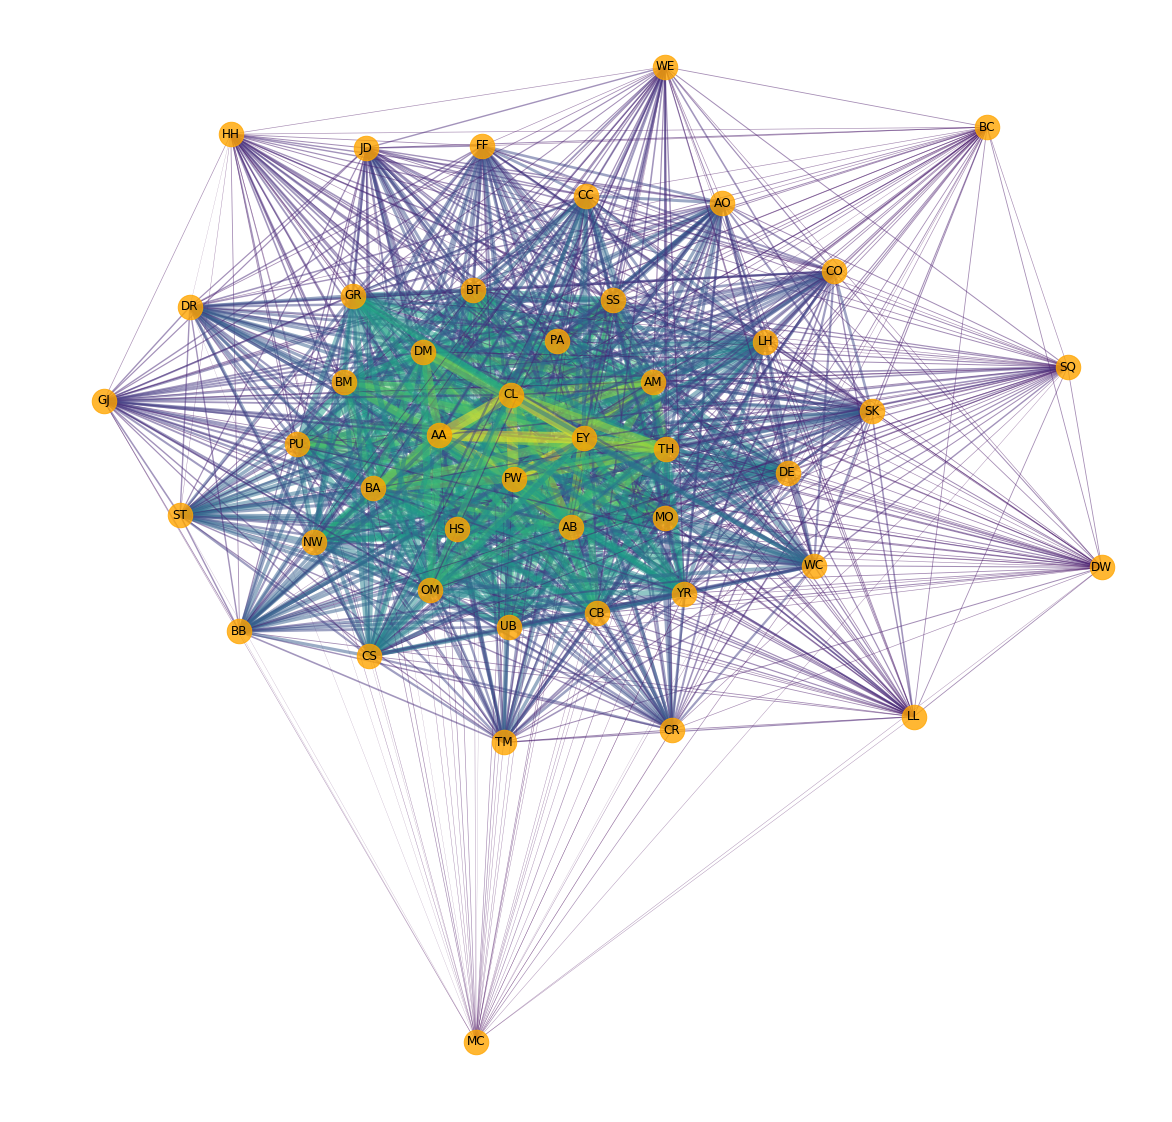

In [338]:
firm_g = bi.weighted_projected_graph(G, bi_firm_nodes)

weights2=[edata['weight'] for f,t,edata in firm_g.edges(data=True)]
width_wt = [x/5 for x in weights2 ]
firm_pos = nx.spring_layout(firm_g,k=1)
plt.figure(figsize=(20,20))
# nx.draw_networkx(firm_g,width=width_wt, edge_color=weights2)
nx.draw_networkx_edges(firm_g, firm_pos, width = width_wt, edge_color=weights2, alpha=0.5)
nx.draw_networkx_nodes(firm_g, firm_pos, node_color="orange", alpha=0.8, node_shape='o', node_size=600)
nx.draw_networkx_labels(firm_g,firm_pos, font_color='black', font_size='12')
plt.axis('off')
plt.show()

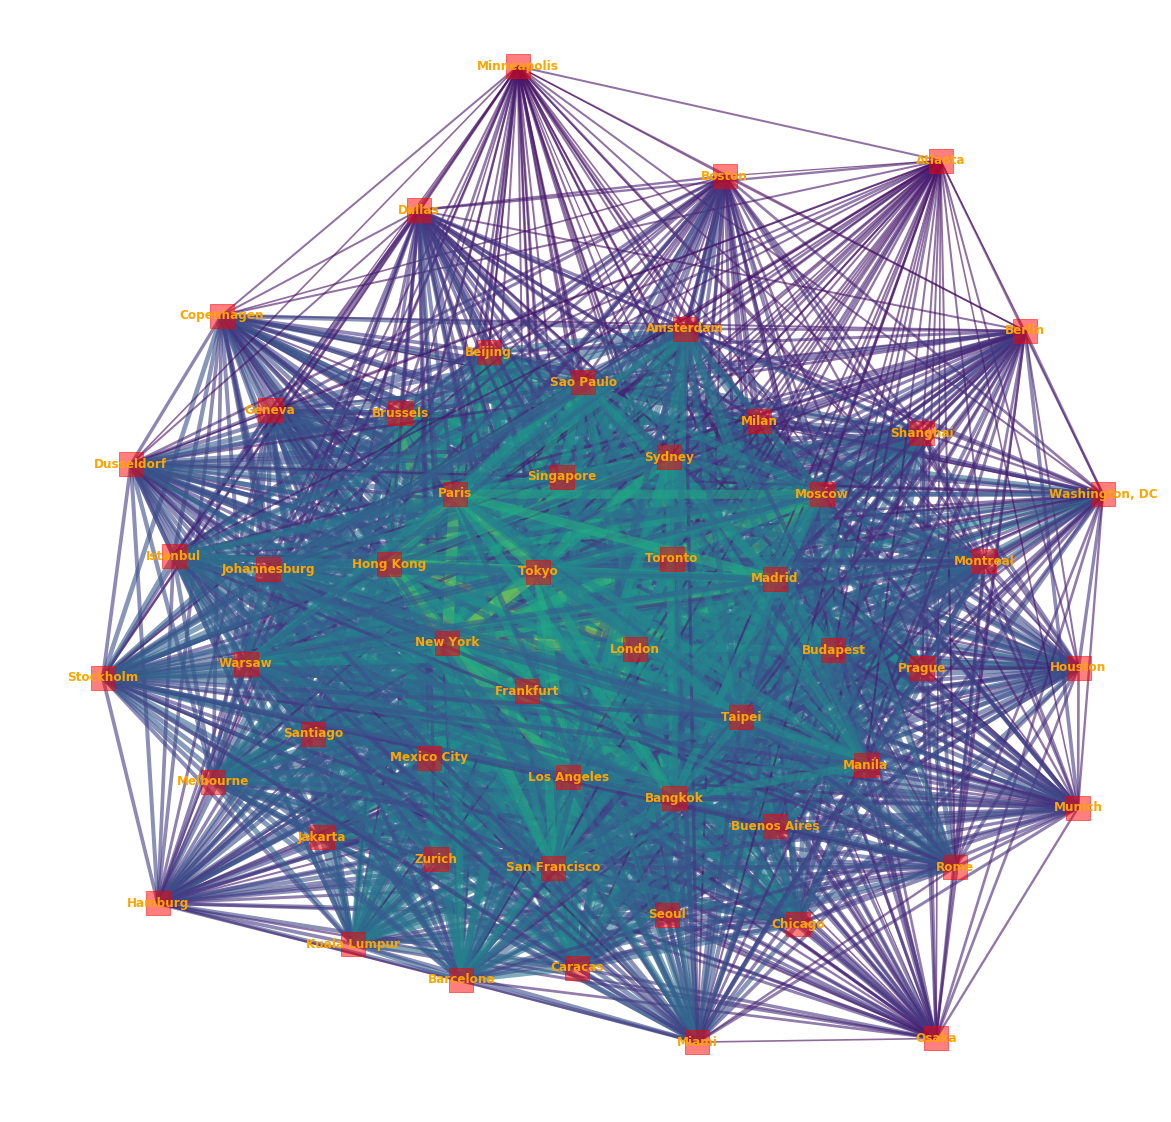

In [72]:
city_g = bi.weighted_projected_graph(G, bi_city_nodes)

weights=[edata['weight'] for f,t,edata in city_g.edges(data=True)]
width_weight = [x/3 for x in weights ]
city_pos = nx.spring_layout(city_g,k=1)
plt.figure(figsize=(20,20))
# nx.draw_networkx(firm_g,width=width_wt, edge_color=weights2)
nx.draw_networkx_edges(city_g, city_pos, width = width_weight, edge_color=weights, alpha=0.6)
nx.draw_networkx_nodes(city_g, city_pos, node_color="r", alpha=0.5, node_shape='s', node_size=600)
nx.draw_networkx_labels(city_g,city_pos, font_color='orange', font_size='12', font_weight='bold')
plt.axis('off')
plt.show()

As per the above two network graphs London, Hong Kong, Tokyo, New York, Paris, Los Angeles house the firms that provide most service values and EY, CL, BM, AA, DM, AB are among the firms that provide most service values. So graphs are showing somewhat  similar findings that were found in the bar charts and the centrality analysis.

#### Apendix:

Firm details:

Accountancy|KP|KPMG

Accountancy|CL|Coopers & Lybrand

Accountancy|EY|Ernst & Young International

Accountancy|AA|Arthur Andersen

Accountancy|PW|Price Waterhouse

Advertising|GR|Grey Worldwide

Advertising|DM|DMB&B (MacManus Group)

Advertising|LH|Lowe Howard -Spink

Advertising|SS|Saatchi and Saatchi

Advertising|TH|JWT (Thompson)

Advertising|OM|Ogilvy & Mather Direct Worldwide

Advertising|DE|Dentsu

Advertising|YR|Young & Rubicam

Advertising|TM|TMP

Advertising|PU|Publicis

Advertising|AM|Abbott Mead Vickers (BBDO)

Banking and Finance|HS|HSBC

Banking and Finance|BA|Barclays

Banking and Finance|NW|NatWest Group

Banking and Finance|SC|Standard Chartered Group

Banking and Finance|CR|Creditanstalt-Bankverein

Banking and Finance|DR|Dresdner Bank Group

Banking and Finance|MO|J P Morgan

Banking and Finance|PA|Compagnie Financi�re de Paribas SA

Banking and Finance|CS|Credit Suisse

Banking and Finance|BB|BBV Group

Banking and Finance|BT|Banker's Trust

Banking and Finance|UB|UBS

Banking and Finance|AB|ABN-AMRO

Banking and Finance|CB|Citibank

Law|BM|Baker & McKenzie

Law|WC|White & Case

Law|LL|Leboeuf

Law|CO|Coudert Brothers Greene & MacRae

Law|SK|Skadden Arps

Law|BC|Bryan Cave

Law|DW|Dorsey & Whitney

Law|GJ|Graham & James

Law|HH|Hogan & Hartson

Law|JD|Jones

Law|MC|Miller Reavis & Pogue

Law|SQ|Squire Paddock & Stone

Law|WE|Wilson

Law|AO|Allen & Overy Moskowitz Edelman & Dicker

Law|CC|Clifford Chance

Law|FF|Freshfields